In [5]:
# Traditional Credit Scoring Using Logistic Regression
import scorecardpy as sc

In [6]:
# data prepare ------
# load germancredit data
dat = sc.germancredit()

# filter variable via missing rate, iv, identical value rate
dt_s = sc.var_filter(dat, y="creditability")

# breaking dt into train and test
train, test = sc.split_df(dt_s, 'creditability').values()

C:\Users\Work\Anaconda3\lib\site-packages\scorecardpy\condition_fun.py:101: UserWarning: The positive value in "creditability" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


In [12]:
# woe binning ------
bins = sc.woebin(dt_s, y="creditability")

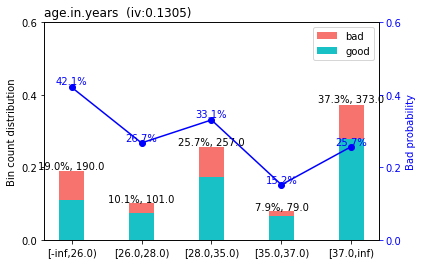

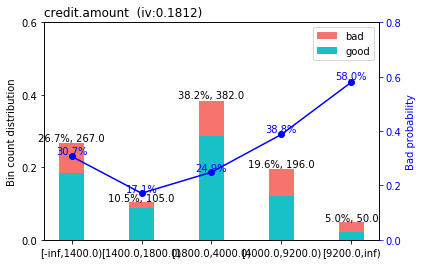

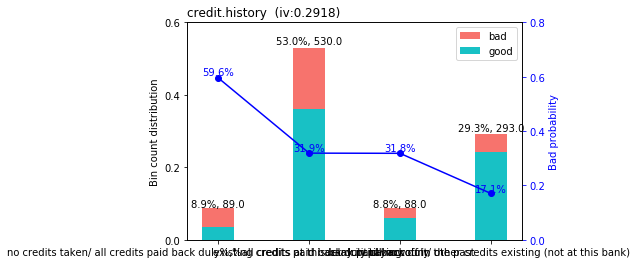

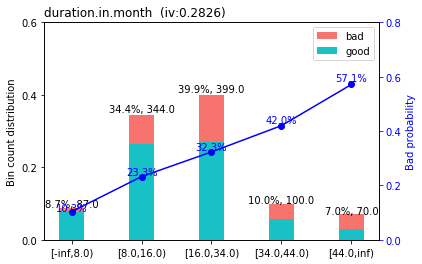

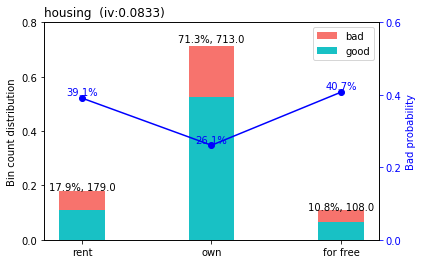

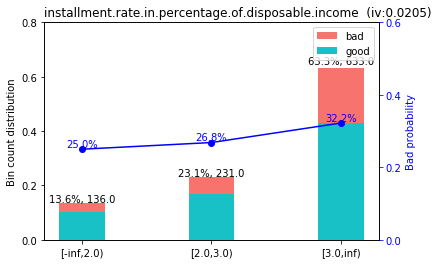

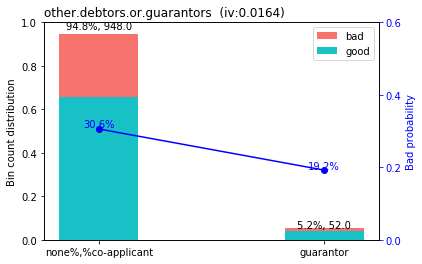

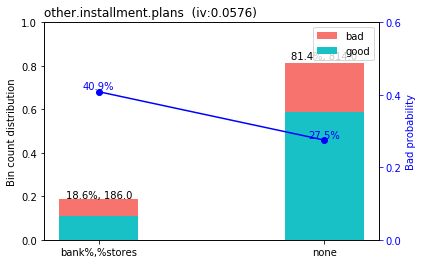

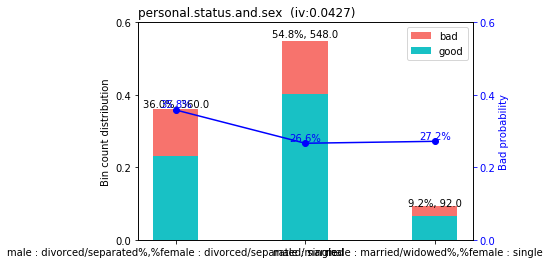

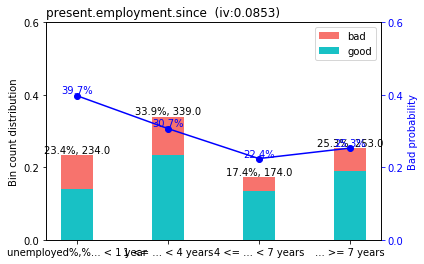

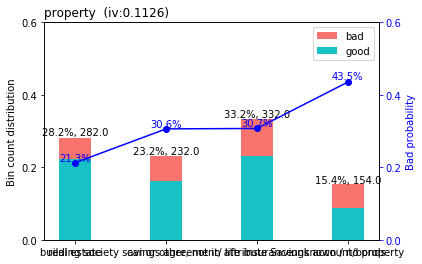

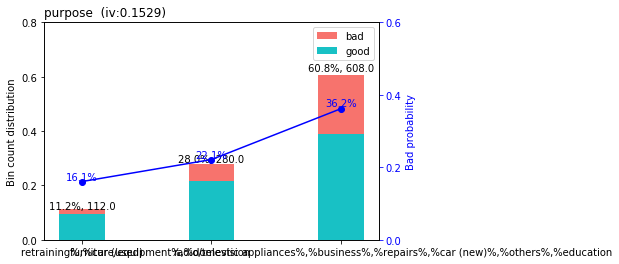

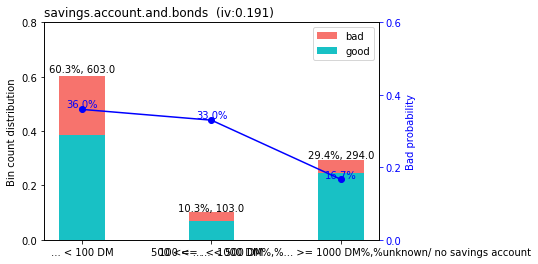

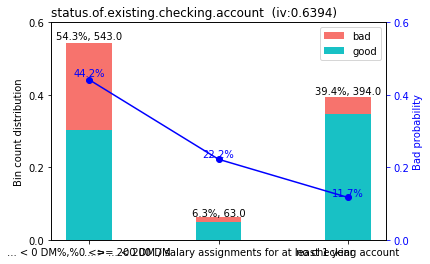

In [15]:
sc.woebin_plot(bins);

In [25]:
breaks_adj = {
    'age.in.years': [26, 35, 40],
    'other.debtors.or.guarantors': ["none", "co-applicant%,%guarantor"]
}
bins_adj = sc.woebin(dt_s, y="creditability", breaks_list=breaks_adj)

In [126]:
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

In [127]:
train_woe.columns = [w.replace('.', '_') for w in train_woe.columns]
test_woe.columns = [y.replace('.', '_') for y in test_woe.columns]

In [107]:
y_train = train_woe.loc[:,'creditability']
X_train = train_woe.loc[:,train_woe.columns != 'creditability']
y_test = test_woe.loc[:,'creditability']
X_test = test_woe.loc[:,train_woe.columns != 'creditability']

In [108]:
# logistic regression ------
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)

LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l1', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

In [168]:
train_pred

array([0.06211568, 0.04295275, 0.67401705, 0.15589359, 0.09797293,
       0.24941991, 0.02967925, 0.88731953, 0.36379179, 0.35000194,
       0.4371989 , 0.03241583, 0.71817068, 0.06464712, 0.18455281,
       0.10994675, 0.03953374, 0.18737459, 0.07474754, 0.24359232,
       0.71947832, 0.59554607, 0.46964371, 0.09360049, 0.56276088,
       0.35175491, 0.13936253, 0.34873292, 0.09090906, 0.27691088,
       0.40665356, 0.12788685, 0.12849651, 0.47576723, 0.19657011,
       0.0266546 , 0.68833028, 0.09464238, 0.29058192, 0.44123542,
       0.05599525, 0.73314393, 0.89642051, 0.15283077, 0.11646621,
       0.15819985, 0.52160074, 0.52557249, 0.38574277, 0.38052382,
       0.16837418, 0.45737315, 0.07679421, 0.27562862, 0.37631659,
       0.19264037, 0.53216845, 0.70262569, 0.43621326, 0.57933274,
       0.04647575, 0.0625848 , 0.0822601 , 0.23602157, 0.26819923,
       0.9352157 , 0.06867844, 0.45871465, 0.15700861, 0.11756847,
       0.48213281, 0.10391717, 0.03004873, 0.34298951, 0.40175

C:\Users\Work\Anaconda3\lib\site-packages\scorecardpy\perf.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  ], ignore_index=True)


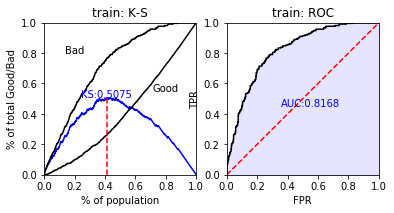

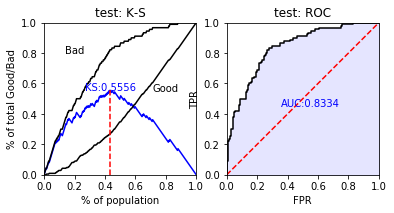

In [110]:
#performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

In [111]:
# score ------
card = sc.scorecard(bins_adj, lr, X_train.columns)
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

C:\Users\Work\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Work\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


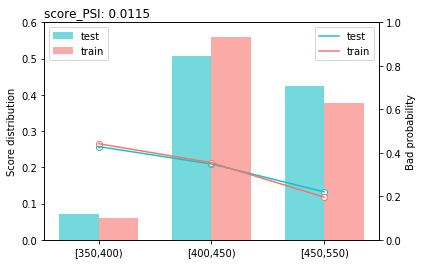

{'psi':   variable      PSI
 0    score  0.01146, 'pic': {'score': <Figure size 432x288 with 2 Axes>}}

In [112]:
# psi
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

# Logistic with Param Tuning in H2O

In [113]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,21 mins 25 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,3 months and 8 days
H2O cluster name:,H2O_from_python_Work_sj45nd
H2O cluster total nodes:,1
H2O cluster free memory:,2.628 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [128]:
train_woe_h2o =h2o.H2OFrame(train_woe)
test_woe_h2o =h2o.H2OFrame(test_woe)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [131]:
predictors=['other_debtors_or_guarantors_woe',
 'status_of_existing_checking_account_woe',
 'savings_account_and_bonds_woe',
 'personal_status_and_sex_woe',
 'installment_rate_in_percentage_of_disposable_income_woe',
 'age_in_years_woe',
 'property_woe',
 'purpose_woe',
 'present_employment_since_woe',
 'credit_history_woe',
 'credit_amount_woe',
 'other_installment_plans_woe',
 'duration_in_month_woe',
 'housing_woe']

response='creditability'

In [135]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid import H2OGridSearch
lambda_opts = [1, 0.5, 0.1, 0.01, 0.001, 0.0001,0.00001, 0]
alpha_opts =[(a/10) for a in range(1,11)]

hyper_parameters = {"lambda":lambda_opts,"alpha":alpha_opts}
glm_grid = H2OGridSearch(H2OGeneralizedLinearEstimator(family="binomial",seed=123,nfolds=10,lambda_search=True,nlambdas=100,standardize=True), hyper_params=hyper_parameters) 
glm_grid.train(x=predictors, y= response, training_frame=train_woe_h2o,validation_frame=test_woe_h2o)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [137]:
glm_gridperf1 = glm_grid.get_grid(sort_by='auc', decreasing=True)
best_glm = glm_gridperf1[0]

In [139]:
best_glm.confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34752642304718906: 


,0,1,Error,Rate
0,385.0,105.0,0.2143,(105.0/490.0)
1,60.0,150.0,0.2857,(60.0/210.0)
Total,445.0,255.0,0.2357,(165.0/700.0)


In [140]:
best_glm.accuracy()

[[0.5068026619477033, 0.77]]

In [141]:
best_glm.auc()

0.8185179786200194

In [142]:
best_glm.summary()

GLM Model: summary



,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,binomial,logit,"Elastic Net (alpha = 0.1, lambda = 0.01 )","nlambda = 100, lambda.max = 1.5508, lambda.min = 0.01, lambda.1se = 0.01",14,14,4,Key_Frame__upload_be67d16d75d3cbbea7cf208de9e144f4.hex


In [144]:
best_glm.model_performance(test_woe_h2o).auc()

0.8307936507936508

C:\Users\Work\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


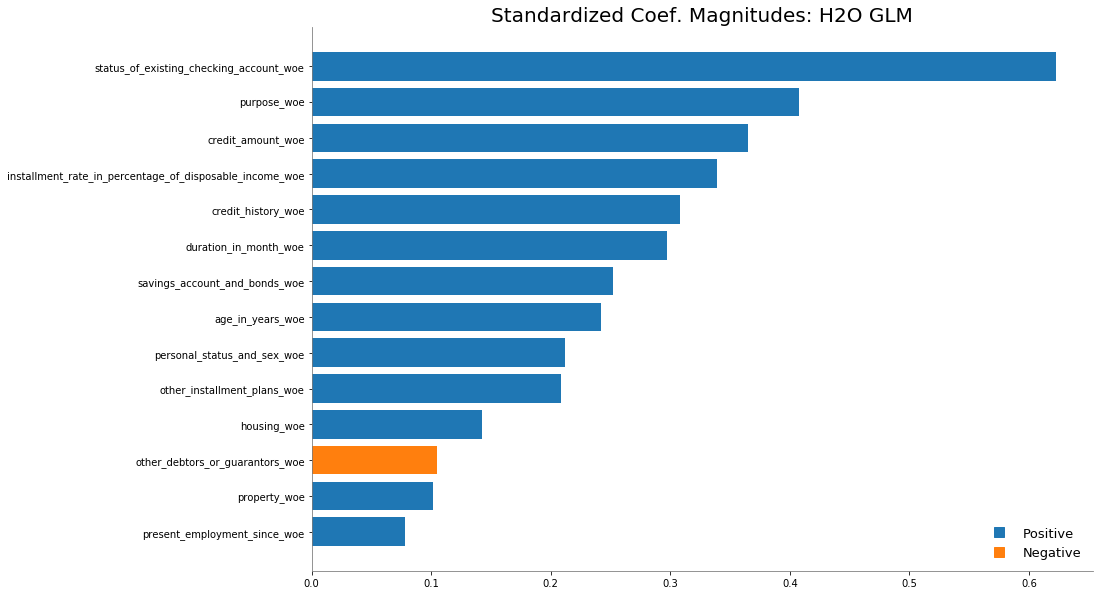

In [145]:
best_glm.std_coef_plot();

In [146]:
coeff_table = best_glm._model_json['output']['coefficients_table']

In [147]:
coeff_table.as_data_frame()

,names,coefficients,standardized_coefficients
0,Intercept,-0.824888,-1.155136
1,other_debtors_or_guarantors_woe,-66.043855,-0.105136
2,status_of_existing_checking_account_woe,0.727078,0.622321
3,savings_account_and_bonds_woe,0.544426,0.252253
4,personal_status_and_sex_woe,1.037400,0.212137
5,installment_rate_in_percentage_of_disposable_income_woe,2.314194,0.338669
6,age_in_years_woe,0.724093,0.241729
7,property_woe,0.305672,0.101346
8,purpose_woe,0.994605,0.407859
9,present_employment_since_woe,0.264834,0.077636


In [148]:
best_glm.precision()

[[0.9387933479669818, 1.0]]

In [188]:
train_predict=best_glm.predict(train_woe_h2o)['p1'].as_data_frame().as_matrix().reshape(-1)
test_predict=best_glm.predict(test_woe_h2o)['p1'].as_data_frame().as_matrix().reshape(-1)

glm prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\Work\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


glm prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\Work\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


C:\Users\Work\Anaconda3\lib\site-packages\scorecardpy\perf.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  ], ignore_index=True)


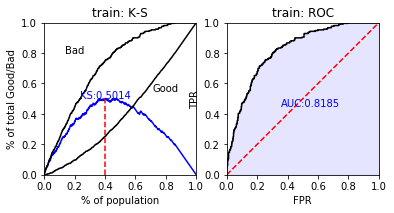

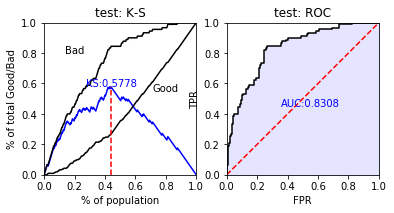

In [189]:
#performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_predict, title = "train")
test_perf = sc.perf_eva(y_test, test_predict, title = "test")

In [238]:
from git import Repo

PATH_OF_GIT_REPO = r'path\to\your\project\folder\.git'  # make sure .git folder is properly configured
COMMIT_MESSAGE = 'comment from python script'

def git_push():
    try:
        repo = Repo(PATH_OF_GIT_REPO)
        repo.git.add(update=True)
        repo.index.commit(COMMIT_MESSAGE)
        origin = repo.remote(name='origin')
        origin.push()
    except:
        print('Some error occured while pushing the code')
    finally:
        print('Code push from script succeeded')       

git_push()

Some error occured while pushing the code
Code push from script succeeded
